Import Required Libraries for Data Cleaning and Preprocessing


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df =pd.read_csv("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\Thoracic_surgery_survival_prediction\\Data Preprocessing\\ThoracicSurgery_orig.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [6]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [7]:
df.columns

Index(['id', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10',
       'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE',
       'Risk1Yr'],
      dtype='object')

In [8]:
# Convert T/F string columns into int columns of 1/0
columns = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11','PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']
df[columns] = np.where(df[columns] == 'T', 1, 0)

In [9]:
# Change columns with string values to just the int values of those columns

df['DGN'] = df['DGN'].apply(lambda x: int(x[-1]))
df['PRE6'] = df['PRE6'].apply(lambda x: int(x[-1]))
df['PRE14'] = df['PRE14'].apply(lambda x: int(x[-1]))

In [10]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [11]:
# Drop unnecessary column. 
df = df.drop(['id'], axis=1)

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [12]:
# Rename column names
col_names = {'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance',
             'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough',
             'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus',
             'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma',
             'AGE': 'Age', 'Risk1Yr': 'Death_In_1yr'}
df = df.rename(index=str, columns=col_names)

In [13]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_In_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


Data Visualization and Cleaning

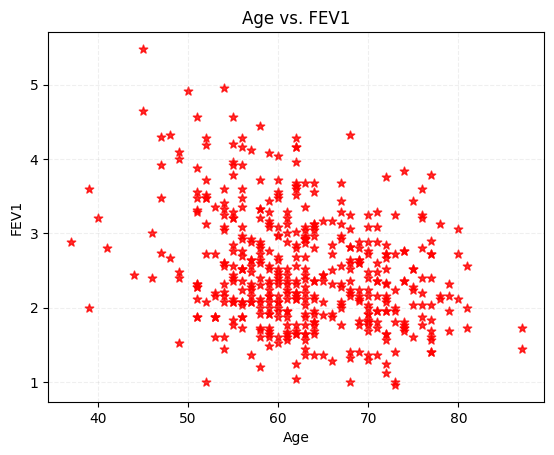

<Figure size 1000x600 with 0 Axes>

In [21]:
plt.scatter(df.Age, df.FEV1, color='red', marker='*', s=40, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.title('Age vs. FEV1')
plt.grid(True, which='both', linestyle='--', alpha=0.2)
plt.figure(figsize=(10, 6))
plt.show()

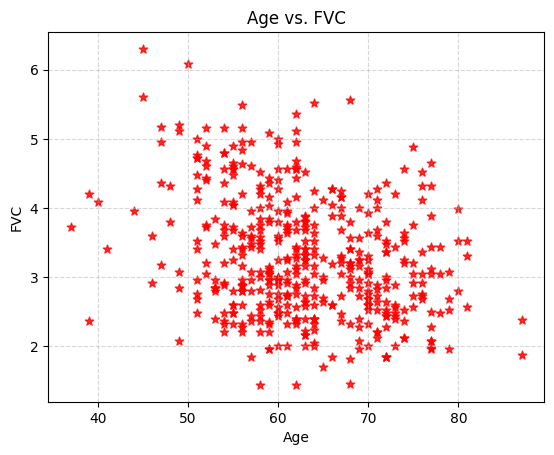

<Figure size 1000x600 with 0 Axes>

In [22]:
plt.scatter(df.Age, df.FVC, color='red', marker='*', s=40, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.title('Age vs. FVC')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.figure(figsize=(10, 6))
plt.show()

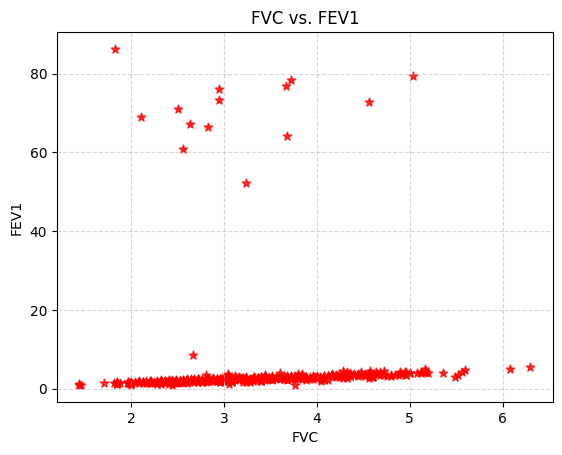

<Figure size 1000x600 with 0 Axes>

In [19]:
plt.scatter(df.FVC, df.FEV1, color='red', marker='*', s=40, alpha=0.8)
plt.xlabel('FVC')
plt.ylabel('FEV1')
plt.title('FVC vs. FEV1')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.figure(figsize=(10, 6))
plt.show()

In [20]:
# Outliers for Age and FEV1 columns removed.
# remove patients age less than 30 and  those with FEV1 greater than 8

df = df[df.Age > 30]
df = df[df.FEV1 < 8]

In [ ]:
len(df)

454

In [ ]:
# store this preprocessed data to new csv file.

df.to_csv("thoracic_surgery.csv", encoding='utf-8', index=False)